<a href="https://colab.research.google.com/github/kirtiman24/Book_Recommendation/blob/master/Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import MiniBatchKMeans

In [70]:
data=pd.read_csv('/content/books.csv')

In [71]:
data.head(5)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Unnamed: 12
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,NaN
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,NaN
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,NaN
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,NaN
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,NaN


In [69]:
data.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher', 'Unnamed: 12'],
      dtype='object')

In [16]:
for x in range(len(list(data.columns))):
    print("{} number of missing values in column {}".format(sum((data.iloc[:,x]).astype('str').str.contains('\?')), 
          list(data.columns)[x]))

0 number of missing values in column bookID
70 number of missing values in column title
0 number of missing values in column authors
0 number of missing values in column average_rating
0 number of missing values in column isbn
0 number of missing values in column isbn13
0 number of missing values in column language_code
0 number of missing values in column   num_pages
0 number of missing values in column ratings_count
0 number of missing values in column text_reviews_count
0 number of missing values in column publication_date
0 number of missing values in column publisher
0 number of missing values in column Unnamed: 12


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

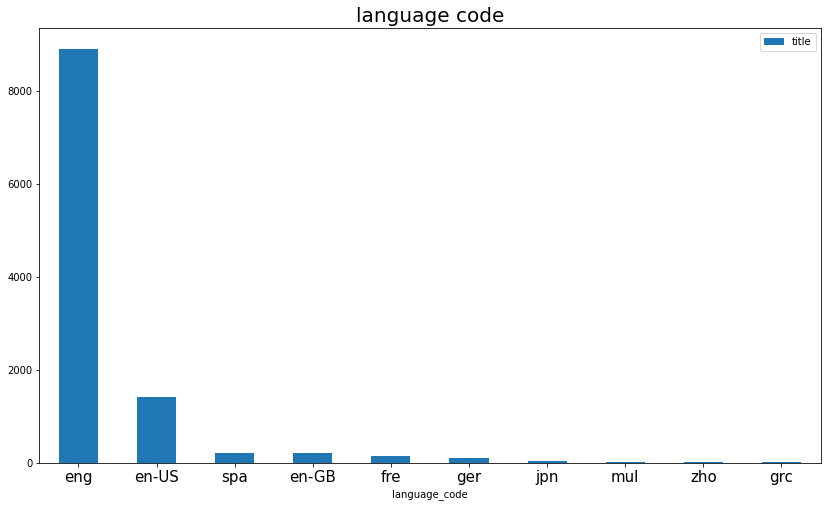

In [72]:
ax =data.groupby('language_code')['title'].count().reset_index().sort_values('title',ascending=False).head(10).set_index('language_code').plot.bar(figsize=(14,8),rot=0)
plt.title('language code',fontsize=20)
plt.xticks(fontsize=15)


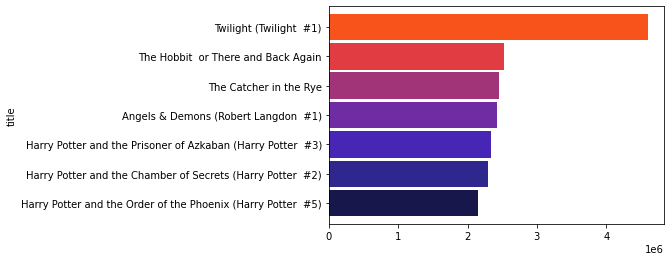

In [29]:
most_rated = data.sort_values('ratings_count',ascending=False).head(7).set_index('title')['ratings_count'].sort_values().plot.barh(width=0.9,color=sns.color_palette('CMRmap',12))



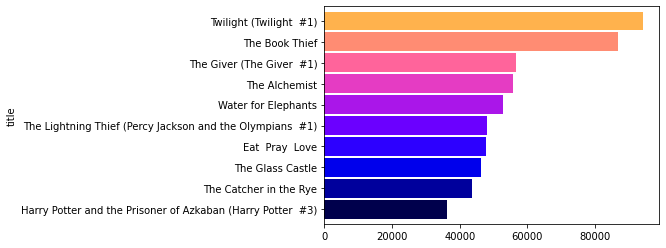

In [37]:
most_text_reviews = data.sort_values('text_reviews_count',ascending=False).head(10).set_index('title')['text_reviews_count'].sort_values().plot.barh(width=0.9,color=sns.color_palette('gnuplot2',12))


Text(0.5, 1.0, 'Top 10 authors with most books')

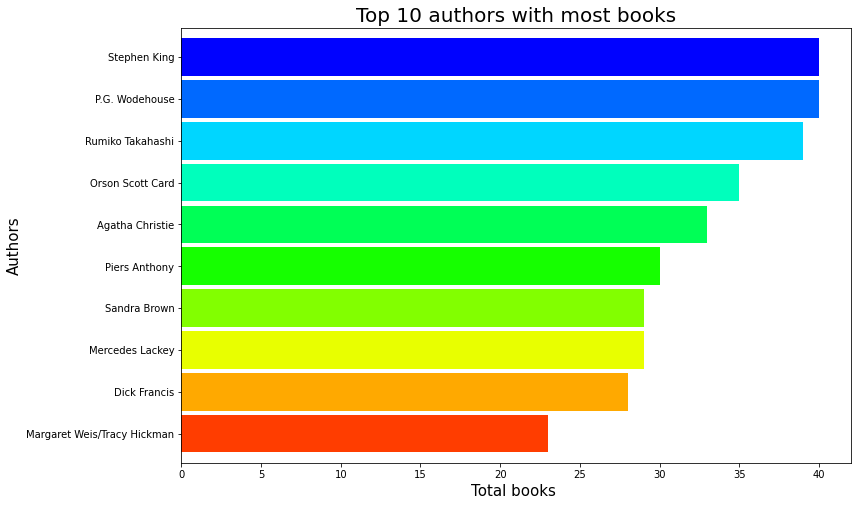

In [39]:
author_of_most_books = data.groupby('authors')['title'].count().reset_index().sort_values('title',ascending=False).head(10).set_index('authors')
plt.subplots(figsize=(12,8))
ax = author_of_most_books['title'].sort_values().plot.barh(width=0.9,color=sns.color_palette('gist_rainbow',12))
ax.set_xlabel("Total books ", fontsize=15)
ax.set_ylabel("Authors", fontsize=15)
ax.set_title("Top 10 authors with most books",fontsize=20,color='black')

In [41]:
data.count().sort_values()

Unnamed: 12               3
title                 11127
authors               11127
average_rating        11127
language_code         11127
  num_pages           11127
ratings_count         11127
text_reviews_count    11127
publication_date      11127
publisher             11127
dtype: int64

In [52]:
sort_rating_book=data[['title','ratings_count']].sort_values('ratings_count',ascending=False)

**`Recommendations based on rating counts`**






In [53]:
n=5
user_input='The Book Thief'
sort_rating_book[(sort_rating_book['title']!=user_input)]['title'][0:n]

10340                              Twilight (Twilight  #1)
1697                   The Hobbit  or There and Back Again
1462                                The Catcher in the Rye
307                   Angels & Demons (Robert Langdon  #1)
3        Harry Potter and the Prisoner of Azkaban (Harr...
Name: title, dtype: object

In [54]:
n=5
user_input='Twilight'
sort_rating_book[(sort_rating_book['title']!=user_input)]['title'][0:n]

10340                              Twilight (Twilight  #1)
1697                   The Hobbit  or There and Back Again
1462                                The Catcher in the Rye
307                   Angels & Demons (Robert Langdon  #1)
3        Harry Potter and the Prisoner of Azkaban (Harr...
Name: title, dtype: object

**Content Based Filtering**

In [82]:
ds = pd.DataFrame({'ID':data['title'].index, 'Title':data['title'].values})
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(ds['Title'])
cosine_similarities = cosine_similarity(tfidf_matrix,tfidf_matrix)
results = {}
for index,value in ds.iterrows(): #iterates through all the rows
    similar_indices = cosine_similarities[index].argsort()[:-6:-1]
    similar_items = [(cosine_similarities[index][i], ds['ID'][i]) for i in similar_indices]
    results[value['ID']] = similar_items[1:]

In [81]:
ds.to_csv('ds.csv')


In [84]:
def item(id):
    return ds.loc[ds['ID'] == id]['Title'].tolist()[0]
def recommend(id, num):
    if (num == 0):
        print("Unable to recommend any book as you have not chosen the number of book to be recommended")
    elif (num==1):
        print("Recommending " + str(num) + " book similar to " + item(id))   
    else :
        print("Recommending " + str(num) + " books similar to " + item(id))
        
    recs = results[id][:num]
    for rec in recs:
        print("You may also like to read: " + item(rec[1]) + " (score:" + str(rec[0]) + ")")

recommend(5456,5)

Recommending 5 books similar to Marine: A Guided Tour of a Marine Expeditionary Unit (Guided Tour)
You may also like to read: Carrier: A Guided Tour of an Aircraft Carrier (Guided Tour) (score:0.3482359503280821)
You may also like to read: Airborne: A Guided Tour Of An Airborne Task Force (score:0.2301648533520905)
You may also like to read: A Guided Tour of 5 Works by Plato: Euthyphro/Apology/Crito/Phaedo/Cave (score:0.2001336693246195)
You may also like to read: Merlin's Tour of the Universe (score:0.12005205185717688)


**Hybrid Model consisting of both author as well as book**

In [86]:
ds1 = pd.DataFrame({'ID':data['title'].index,'Author':data['authors'].values, 'Title':data['title'].values})
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(ds['Title'])
cosine_similarities = cosine_similarity(tfidf_matrix,tfidf_matrix)
results = {}
for index,value in ds.iterrows(): #iterates through all the rows
    similar_indices = cosine_similarities[index].argsort()[:-6:-1]
    similar_items = [(cosine_similarities[index][i], ds['ID'][i]) for i in similar_indices]
    results[value['ID']] = similar_items[1:]

In [87]:
def item(id):
    return ds1.loc[ds1['ID'] == id]['Author'].tolist()[0]
def book(id):
    return ds1.loc[ds1['ID'] == id]['Title'].tolist()[0]
def recommend(id, num):
    if (num == 0):
        print("Unable to recommend any book as you have not chosen the number of book to be recommended")    
    else :
        print("Recommending " + str(num) + " similar books to  " + book(id) + " written by " + item(id))
        
    recs = results[id][:num]
    for rec in recs:
        print("You may also like to read: " + book(rec[1]) + " by author " + item(rec[1]) + " (score:" + str(rec[0]) + ")")


In [90]:
recommend(96,5)

Recommending 5 similar books to  Dinner with Anna Karenina written by Gloria Goldreich
You may also like to read: Anna Karenina by author Leo Tolstoy/Richard Pevear/Larissa Volokhonsky/John Bayley (score:0.6417284412791181)
You may also like to read: Anna Karenina by author Leo Tolstoy/Constance Garnett (score:0.6417284412791181)
You may also like to read: Anna Karenina by author Leo Tolstoy/Amy Mandelker/Constance Garnett (score:0.6417284412791181)
You may also like to read: Anna Karenina by author Leo Tolstoy/David Magarshack/Priscilla Meyer (score:0.6417284412791181)
